# Did deplatforming reduce misinformation on Twitter? 

This is a brief computational essay providing data-driven answers to the question posed in the title and reflections on the strengths and limitations of the dataset and the Difference in Differences method. <br> 
This project is based on the research paper\
[Post-January 6th deplatforming reduced the reach of misinformation on Twitter](https://www.nature.com/articles/s41586-024-07524-8)

The dataset that accompanies this paper has been compiled and included as a Pandas dataframe (assigned to the variable `mccabe_data`).

# **Section 1**: Twitter Dataset

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/home/jovyan/CSS1A/CSS1A/notebooks/mccabe-public-data.csv')
df.head(5)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
0,2019-11-30,875.0,199.0,676.0,74.0,207.0,42.0,138.0,188.0,653.0,...,196.0,61.0,135.0,16.0,7.0,9.0,12387.0,total,4390,fns
1,2019-12-01,3382.0,825.0,2557.0,257.0,941.0,120.0,546.0,760.0,2293.0,...,608.0,207.0,401.0,99.0,33.0,66.0,54897.0,total,11629,fns
2,2019-12-02,3644.0,992.0,2652.0,280.0,780.0,141.0,479.0,926.0,2455.0,...,684.0,289.0,395.0,82.0,37.0,45.0,68505.0,total,13132,fns
3,2019-12-03,4184.0,1110.0,3074.0,339.0,921.0,185.0,562.0,1052.0,2890.0,...,782.0,236.0,546.0,92.0,41.0,51.0,74502.0,total,13997,fns
4,2019-12-04,4436.0,1100.0,3336.0,307.0,1171.0,135.0,540.0,1038.0,3146.0,...,540.0,261.0,279.0,124.0,53.0,71.0,71762.0,total,13967,fns


In [21]:
df.shape

(32968, 29)

In [22]:
df.columns

Index(['date', 'fake_merged', 'fake_merged_initiation', 'fake_merged_rt',
       'fake_grinberg_initiation', 'fake_grinberg_rt',
       'fake_grinberg_rb_initiation', 'fake_grinberg_rb_rt',
       'fake_newsguard_initiation', 'fake_newsguard_rt', 'not_fake',
       'not_fake_initiation', 'not_fake_rt', 'not_fake_conservative',
       'not_fake_conservative_initiation', 'not_fake_conservative_rt',
       'not_fake_liberal', 'not_fake_liberal_initiation',
       'not_fake_liberal_rt', 'not_fake_shopping',
       'not_fake_shopping_initiation', 'not_fake_shopping_rt',
       'not_fake_sports', 'not_fake_sports_initiation', 'not_fake_sports_rt',
       'n', 'stat', 'nusers', 'group'],
      dtype='object')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
groups = df.group.unique()
groups

array(['fns', 'suspended', 'ha', 'ma', 'la', 'qanon', 'av', 'ss1', 'ss5',
       'A', 'B', 'D', 'F', 'all', 'nfns', 'nfns_ha', 'nfns_ma', 'nfns_la',
       'A_ha', 'B_ha', 'D_ha', 'F_ha', 'A_ma', 'B_ma', 'D_ma', 'F_ma',
       'A_la', 'B_la', 'D_la', 'F_la'], dtype=object)

In [5]:
start_date_1 = '2021-01-13' # post_treatment_period_start_date
end_date_1 = '2021-01-29'  # post_treatment_period_end_date
post_treatment_period_data = df[(df['date'] >= start_date_1) & (df['date'] < end_date_1)]
post_treatment_period_data.sample(4)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
32497,2021-01-18,184.000000,22.000000,162.000000,7.000000,44.000000,6.000000,33.000000,21.000000,160.000000,...,11.000000,7.000000,4.000000,13.000000,6.0000,7.000000,2826.000000,total,639,F_la
32156,2021-01-21,0.672783,0.146789,0.525994,0.018349,0.070336,0.012232,0.036697,0.146789,0.510703,...,0.097859,0.000000,0.097859,0.000000,0.0000,0.000000,4.984709,avg,327,D_la
24110,2021-01-14,0.002924,0.000989,0.001934,0.000247,0.000652,0.000225,0.000315,0.000967,0.001889,...,0.022826,0.015067,0.007759,0.002519,0.0009,0.001619,1.916860,avg,44467,nfns_ma
30463,2021-01-13,12.000000,4.000000,8.000000,3.000000,4.000000,1.000000,1.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,307.000000,total,105,A_la


## **Section 1.5** Introduction
In the aftermath of the January 6th, 2021, Capitol riots, Twitter implemented a sweeping deplatforming intervention, which included suspending the account of then-President Donald Trump and several high-profile accounts associated with right-wing misinformation networks. This computational essay explores whether this intervention effectively reduced the spread of misinformation on Twitter. Using the dataset accompanying the McCabe et al. study, I will conduct a Difference-in-Differences (DiD) analysis to conceptually replicate their findings and answer the research question: Did the deplatforming intervention reduce misinformation sharing?

To ensure a comprehensive exploration, this essay is divided into four sections. 
- Section 2: Data Exploration inspects the structure of the dataset and user behaviors over time,
- Section 3: Replication replicates the DiD analysis to support the primary conclusions,
- Section 4: Extensions applies further analyses to test key assumptions and explore additional insights, and
- Section 5: Conclusion reflects on the results, the limitations of the analysis, and the effectiveness of the intervention.

---

# **Section 2** Exploring the structure of the dataset

The data exploration focuses on examining the key user groups and patterns in misinformation sharing before and after the intervention. I will also analyze whether suspended accounts resumed posting and whether misinformation sharers reduced their activity after January 12, 2021.

### Overview of the Dataset: 
The dataset includes 1.5 million Twitter users linked to a commercial voter file, with observations covering the period from December 1, 2020, to January 29, 2021. The study focused on 599,697 active users who posted at least one tweet or retweet during the period. Of these users, 44,734 were identified as misinformation sharers, defined as users who posted at least one URL from domains classified as misinformation.
The dataset provides daily observations with variables such as:
- **nusers**: Number of unique users posting on a given day.
- **n**: Total number of tweets and retweets.
- **stat**: Aggregation type, such as total or avg.
- **Groups**: User subgroups, including QAnon followers, Trump-only followers, and suspended accounts.

 These variables allow us to explore user behavior and the impact of the deplatforming intervention.

<font color='brown'> **Exploring User Engagement Patterns: QAnon and Trump Followers Over Time**

2.1 QAnon-affiliated accounts were a significant source of misinformation on Twitter. The data shows that over 700 unique QAnon users were active on certain days during 2020. Their numbers decreased after January 2021's deplatforming period. <br>
2.2 Trump followers exhibited significant activity throughout 2020, with some fluctuations corresponding to political events. A noticeable dip occurred in November 2020, likely reflecting disillusionment following the announcement of Trump’s loss in the presidential election. This reduction in activity aligns with the certification of Biden’s win on November 7, 2020, suggesting that the loss may have caused some followers to disengage temporarily. Activity rebounded shortly after but dropped again following Trump’s deplatforming in January 2021, marking the end of his presence on Twitter and limiting his followers' engagement on the platform.

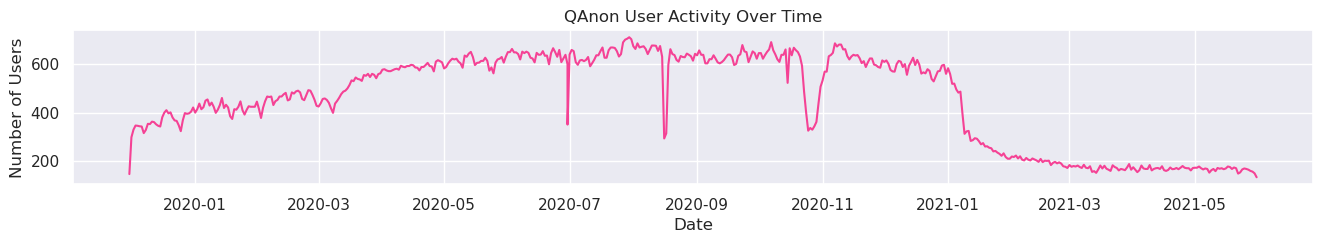

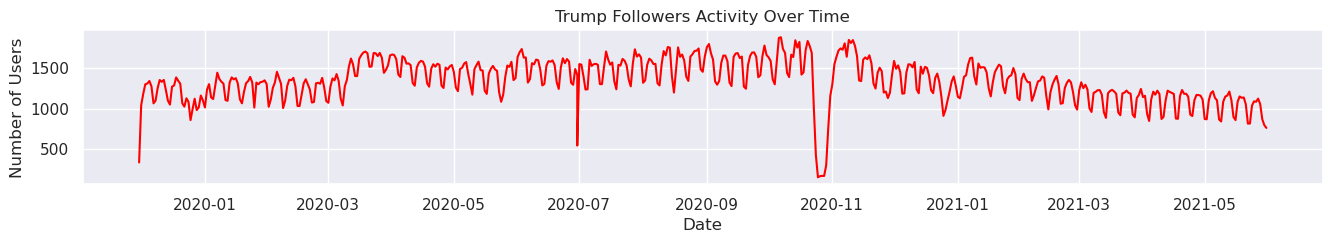

In [6]:
# 2.1
# Subset to QAnon group
qanon = df[df['group'] == "qanon"].copy()
qanon_totals = qanon[qanon['stat'] == "total"].copy()

# Plot the number of QAnon users over time
plt.figure(figsize=(16, 2))
plt.plot(qanon_totals.date, qanon_totals.nusers, color="#f54295")
plt.title('QAnon User Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()


#2.2 
# Subset to Trump followers
trump_followers = df[df['group'] == 'A'].copy()
trump_totals = trump_followers[trump_followers['stat'] == 'total'].copy()

# Plot the number of Trump followers over time
plt.figure(figsize=(16, 2))
plt.plot(trump_totals.date, trump_totals.nusers, color="red")
plt.title('Trump Followers Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()

<font color='brown'> **QAnon and Trump Followers' Posting and Misinformation Patterns in 2021**

2.3 I analyzed QAnon users' total posts and posts tagged as misinformation (fake_merged). The data shows a sharp decline in QAnon posts after the January 2021 deplatforming event.This decline suggests that the deplatforming event not only reduced misinformation but also disrupted the posting behavior of QAnon users, diminishing their presence on Twitter.  <br>
2.4 The graph for Trump followers shows a relatively consistent pattern of posting throughout 2021, with slightly higher activity in January followed by a gradual decline. However, the volume of posts tagged as misinformation is significantly lower compared to the QAnon group, which aligns with the more narrowly defined nature of Trump-only followers. Since 'A' refers exclusively to followers of Trump, it is natural that their total posting activity is smaller. I also created a log-scale version of the graph to better capture subtle patterns in misinformation posts, which would otherwise be difficult to observe due to the relatively lower frequency compared to all tweets.

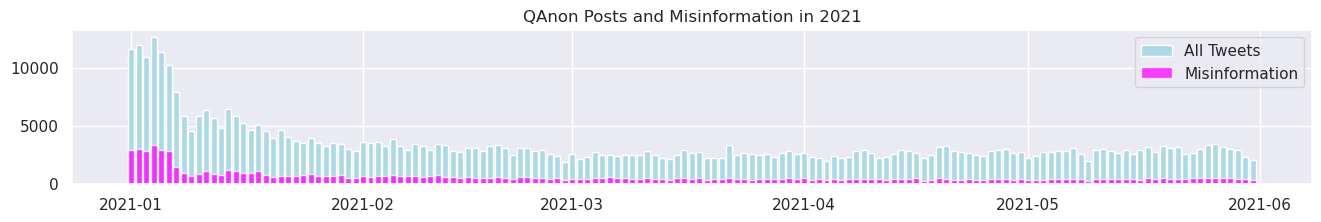

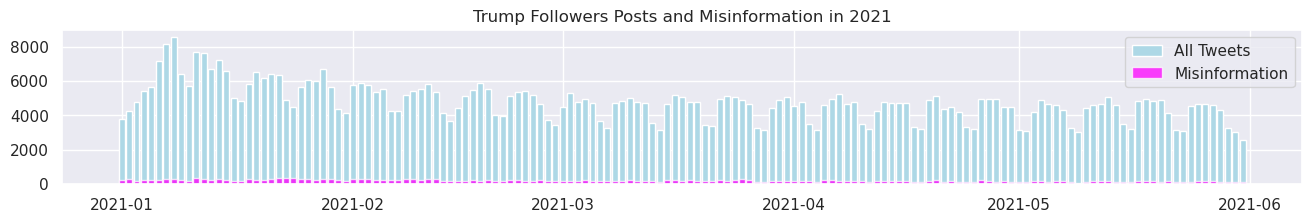

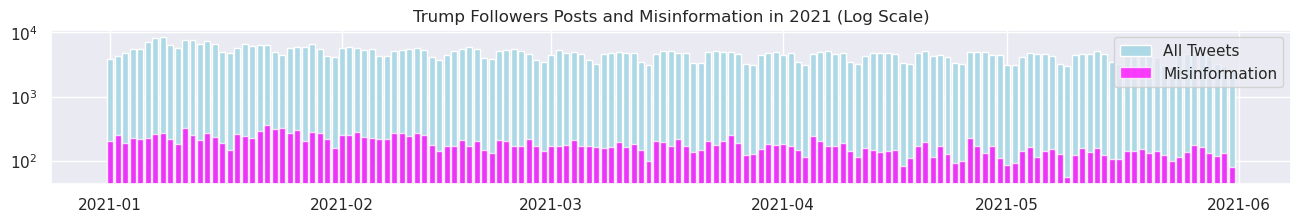

In [27]:
# Subset to QAnon tweets in 2021
qanon_totals_2021 = qanon_totals[qanon_totals.date >= "2021-01-01"]

# Plot the total posts and misinformation posts
plt.figure(figsize=(16, 2))
plt.bar(qanon_totals_2021.date, qanon_totals_2021.n, color='lightblue', label="All Tweets")
plt.bar(qanon_totals_2021.date, qanon_totals_2021.fake_merged, color='magenta', alpha=0.75, label="Misinformation")
plt.legend()
plt.title('QAnon Posts and Misinformation in 2021')
plt.show()

# Subset to Trump followers tweets in 2021
trump_totals_2021 = trump_totals[trump_totals.date >= "2021-01-01"]

# Plot the total posts and misinformation posts
plt.figure(figsize=(16, 2))
plt.bar(trump_totals_2021.date, trump_totals_2021.n, color='lightblue', label="All Tweets")
plt.bar(trump_totals_2021.date, trump_totals_2021.fake_merged, color='magenta', alpha=0.75, label="Misinformation")
plt.legend()
plt.title('Trump Followers Posts and Misinformation in 2021')
plt.show()

plt.figure(figsize=(16, 2))
plt.bar(trump_totals_2021.date, trump_totals_2021.n, color='lightblue', label="All Tweets")
plt.bar(trump_totals_2021.date, trump_totals_2021.fake_merged, color='magenta', alpha=0.75, label="Misinformation")
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.title('Trump Followers Posts and Misinformation in 2021 (Log Scale)')
plt.show()


<font color='brown'> **Number of Misinformation Sharing Posts by suspended users & follower vs non-follower groups after January 12th**

2.5 I examined whether suspended users resumed posting after the suspension period ended. The data confirms that these users did not engage in misinformation sharing on Twitter after January 12th, 2021, indicating that the deplatformed accounts were not reinstated. Many deplatformed users likely migrated to alternative platforms such as Gab and Parler, which saw a surge in user activity around that time. This migration highlights the lasting impact of the deplatforming event on Twitter's content landscape, contributing to a significant reduction in misinformation on the platform. <br>
Group B, representing followers of suspended users, exhibited a notable 64.39% reduction in misinformation posts during the post-treatment period (January 13–29, 2021) compared to the pre-treatment period. This suggests that the deplatforming had a broader influence, curbing misinformation not just from the suspended users themselves but also among their followers. <br>
In contrast, Group F, the non-followers of suspended users, showed a smaller but still meaningful decline in misinformation posts, with a 55.21% reduction. While these users were not directly linked to the deplatformed accounts, the overall decline implies that Twitter's intervention may have had a ripple effect across the platform, possibly due to heightened moderation efforts and the changing platform dynamics post-intervention. <br>
This comparative analysis confirms that the deplatforming event not only suppressed the influence of high-profile misinformation spreaders but also indirectly reduced misinformation sharing among their followers and other users.

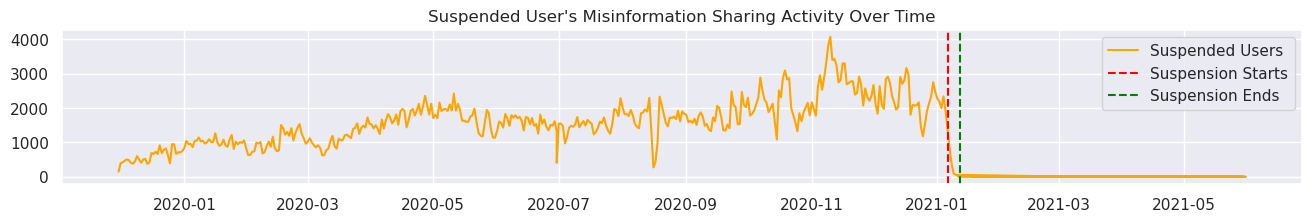

Misinfo Sharing posts by suspended users after January 12th: 280.0


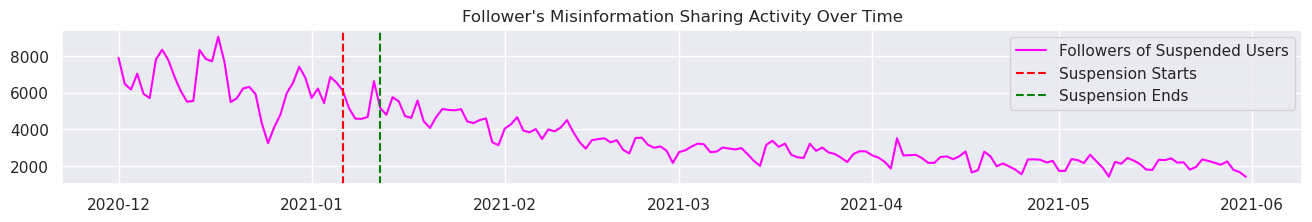

Misinfo sharing posts by followers during pre-treatment period(2020-12-01~2021-01-06): 231563.0
Misinfo sharing posts by followers during post-treatment period(2021-01-13~2021-01-29): 82450.0
Percentage change: -64.39%


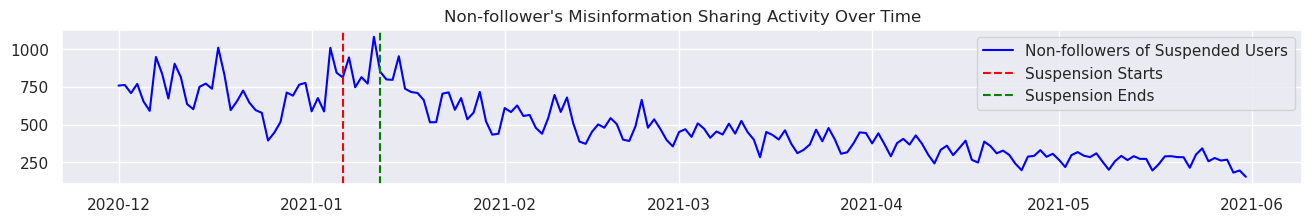

Misinfo sharing posts by non-followers during pre-treatment period(2020-12-01~2021-01-06): 25570.0
Misinfo sharing posts by non-followers during post-treatment period(2021-01-13~2021-01-29): 11454.0
Percentage change: -55.21%


In [28]:
## 1. Subset to suspended accounts(deplatformed)
suspended = df[(df['group'] == 'suspended') & (df['stat'] == 'total')].copy()
suspended_after = suspended[suspended.date > '2021-01-12']

# Plot misinfo sharing post counts over time
plt.figure(figsize=(16, 2))
plt.plot(suspended.date, suspended.fake_merged, color='orange', label='Suspended Users')
plt.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--', label='Suspension Starts')
plt.axvline(pd.to_datetime('2021-01-12'), color='green', linestyle='--', label='Suspension Ends')
plt.legend()
plt.title("Suspended User's Misinformation Sharing Activity Over Time")
plt.show()

# Misinfo sharing posts by suspended users after Jan 12th
total_posts_after = suspended_after['fake_merged'].sum()
print(f"Misinfo Sharing posts by suspended users after January 12th: {total_posts_after}")

## 2. Subset to followers of any suspended users(B)
B = df[(df['group'] == 'B') & (df['stat'] == 'total') & (df['date'] >= '2020-12-01')].copy()
B_pre_period = B[(B.date >= '2020-12-01') & (B.date < '2021-01-06')]
B_post_period = B[(B.date > '2021-01-12') & (B.date <= '2021-01-29')]

# Plot misinfo sharing post counts over time
plt.figure(figsize=(16, 2))
plt.plot(B.date, B.fake_merged, color='magenta', label='Followers of Suspended Users')
plt.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--', label='Suspension Starts')
plt.axvline(pd.to_datetime('2021-01-12'), color='green', linestyle='--', label='Suspension Ends')
plt.legend()
plt.title("Follower's Misinformation Sharing Activity Over Time")
plt.show()

# Misinfo sharing posts by followers of any suspended users during pre-treatment period(December 1, 2020 – January 6, 2021) & post-treatment period(January 13 – January 29, 2021)
total_pre_1 = B_pre_period['fake_merged'].sum()
print(f"Misinfo sharing posts by followers during pre-treatment period(2020-12-01~2021-01-06): {total_pre_1}")
total_post_1 = B_post_period['fake_merged'].sum()
print(f"Misinfo sharing posts by followers during post-treatment period(2021-01-13~2021-01-29): {total_post_1}")
# Calculate the percentage change from pre-treatment to post-treatment
percentage_change_1 = ((total_post_1 - total_pre_1) / total_pre_1) * 100
print(f"Percentage change: {percentage_change_1:.2f}%")

## 3. Subset to non-followers of suspended users(F)
F = df[(df['group'] == 'F') & (df['stat'] == 'total') & (df['date'] >= '2020-12-01')].copy()
F_pre_period = F[(F.date >= '2020-12-01') & (F.date < '2021-01-06')]
F_post_period = F[(F.date > '2021-01-12') & (F.date <= '2021-01-29')]

# Plot misinfo sharing post counts over time
plt.figure(figsize=(16, 2))
plt.plot(F.date, F.fake_merged, color='blue', label='Non-followers of Suspended Users')
plt.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--', label='Suspension Starts')
plt.axvline(pd.to_datetime('2021-01-12'), color='green', linestyle='--', label='Suspension Ends')
plt.legend()
plt.title("Non-follower's Misinformation Sharing Activity Over Time")
plt.show()

# Misinfo sharing posts by non-followers of suspended users during post-treatment period
total_pre_2 = F_pre_period['fake_merged'].sum()
print(f"Misinfo sharing posts by non-followers during pre-treatment period(2020-12-01~2021-01-06): {total_pre_2}")
total_post_2 = F_post_period['fake_merged'].sum()
print(f"Misinfo sharing posts by non-followers during post-treatment period(2021-01-13~2021-01-29): {total_post_2}")
# Calculate the percentage change from pre-treatment to post-treatment
percentage_change_2 = ((total_post_2 - total_pre_2) / total_pre_2) * 100
print(f"Percentage change: {percentage_change_2:.2f}%")


<font color='brown'> **Summary of Section 2:**
Below is a summary of the key findings from this section. <br>
- QAnon User Engagement:
QAnon-affiliated accounts were identified as a significant source of misinformation. Their activity peaked during 2020 but dropped sharply in early 2021, especially after the January deplatforming. This decline implies that the intervention disrupted the behavior of these users, reducing their presence and impact on the platform.
- Trump Followers’ Behavior:
Trump followers showed varying engagement patterns in response to key political events. A noticeable dip in activity occurred around November 2020, coinciding with Trump’s loss in the election. Activity rebounded temporarily but declined again following Trump’s suspension in January 2021. This pattern aligns with the timeline of Trump’s deplatforming, suggesting that his absence impacted follower engagement and misinformation spreading.
- Impact of Misinformation Tagging:
QAnon users not only decreased their total posts but also reduced posts classified as misinformation (fake_merged). The trend highlights that the deplatforming event reduced both overall activity and misinformation from this group. In comparison, Trump followers maintained steady posting activity but posted fewer misinformation-related tweets than QAnon users, reflecting the distinct nature of these user subgroups.
- Suspended Users and Migration:
Analysis of suspended accounts shows that users removed during the intervention did not resume posting on Twitter after January 12th, 2021. This finding suggests that suspended users were not reinstated and likely migrated to platforms like Gab and Parler, which saw increased activity around the same period. This migration underscores the lasting effect of the deplatforming on reshaping Twitter’s content landscape.
- Followers vs. Non-Followers:
Group B (followers of suspended users) reduced their misinformation posts by 64.39% after the deplatforming, indicating that the intervention had a spillover effect by influencing both the deplatformed users and their followers. Non-followers (Group F) also exhibited a 55.21% decline in misinformation posts, reflecting the broader impact of Twitter’s content moderation efforts beyond directly connected users. <br>

**Conclusion**:
The data exploration confirms that the deplatforming intervention had a substantial impact on curbing misinformation and reshaping engagement patterns on Twitter. The decline in activity among QAnon users, Trump followers, and suspended accounts highlights how removing influential actors from the platform affects both direct misinformation sources and their followers.

---

# **Section 3** Replication of Main DiD Results

**The DiD analysis examines whether the deplatforming intervention reduced misinformation sharing by comparing followers and non-followers of deplatformed users before and after the intervention. The treatment group includes users who followed at least one deplatformed account, while the control group consists of users who did not. Here are the variables I have taken into account to do the DiD analysis.** <br>
- Pre-treatment Period: December 1, 2020 – January 6, 2021.
- Intervention : January 6, 2021 - January 12, 2021
- Post-treatment Period: January 13, 2021 – January 29, 2021.
- Treatment Group: Followers of deplatformed users (B).
- Control Group: Non-followers of deplatformed users (F). <br>
- Outcome: Number of misinformation tweets and retweets.
- Interaction Term: Time (pre- and post-intervention) × Group (follower or non-follower).

<font color='brown'> **3.1 DiD Analysis 1: The Impact of Deplatforming on Misinformation Retweet Activity**

This DiD analysis examines the impact of deplatforming on misinformation retweets by comparing trends between the treatment group (followers of suspended users) and the control group (non-followers). **The interaction term (post_treatment:treatment_group) has a coefficient of -649.67, with a t-value of -6.05 and a p-value of 0.000, indicating a significant reduction in retweet activity for the treatment group after the intervention, relative to the control group. This suggests that deplatforming effectively curtailed misinformation sharing among followers of suspended users.** <br>
As shown in above graph, the control group (non-followers) experienced an increase in retweets after the intervention, while the treatment group (followers) exhibited a decrease. Under the parallel trends assumption, it is likely that the treatment group’s retweets would have continued to increase in the absence of deplatforming (counterfactual path). **Therefore, the observed reduction in retweets can be attributed to the causal effect of deplatforming.** 

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df['post_treatment'] = (df['date'] >= '2021-01-13').astype(int)

# Define treatment group: 1 for followers ('B'), 0 for non-followers ('F')
df['treatment_group'] = (df['group'] == 'B').astype(int)

# Define the DiD formula
did_formula = 'fake_merged_rt ~ post_treatment + treatment_group + post_treatment * treatment_group'

# Fit the DiD model using OLS regression
did_model = smf.ols(did_formula, data=df).fit()

# Print the summary of the DiD model
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     505.7
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.72e-321
Time:                        02:05:40   Log-Likelihood:            -2.8835e+05
No. Observations:               32968   AIC:                         5.767e+05
Df Residuals:                   32964   BIC:                         5.767e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**However, the imbalance in post-treatment observations (278 for the treatment group vs. 8048 for the control group) should be noted**, and I suggest expanding the post-treatment window to benefit future iterations. I will also focus on high-activity users to come up with more robust results in the next step.

In [76]:
# Within each group, calculate descriptive statistics
df.groupby(['treatment_group', 'post_treatment'])['fake_merged_rt'].describe()

count         mean          std       min  \
treatment_group post_treatment                                                
0               0               23820.0   806.562725  1688.265928  0.000000   
                1                8048.0   295.317010   627.935885  0.000000   
1               0                 822.0  2220.414176  2434.050508  0.185953   
                1                 278.0  1059.501239  1204.038519  0.170643   

                                     25%         50%      75%      max  
treatment_group post_treatment                                          
0               0               0.152366    4.607014   545.00  16145.0  
                1               0.150538    3.147395   214.25   5579.0  
1               0               0.432347  256.052445  4234.25  11290.0  
                1               0.257979  466.750055  1903.50   4573.0

<font color='brown'> **3.2 DiD Analysis 2: Analysis of High-Activity Users(D_ha) and the Effect of Deplatforming**

Next, I will focus on high-activity followers, especially those who are a follower of four or more deplatformed users(D_ha). I conducted a separate DiD regression to explore whether the effect of deplatforming is more pronounced among these users. By isolating this group, the analysis aims to better understand how user engagement levels influence the impact of deplatforming on misinformation sharing behavior.
The regression result showed that following the intervention, high-activity followers(D_ha) experienced a significant drop in retweet activity compared to the control group (non-followers). The negative coefficient for the interaction term indicates that, without deplatforming, high-activity followers would likely have continued sharing misinformation at higher rates (counterfactual path). <br>
**From this analysis, I learned that high-activity users are more sensitive to deplatforming, further validating the intervention’s impact.** This insight emphasizes the importance of targeting high-activity users to effectively curb misinformation. Future research could further explore engagement patterns or apply similar interventions to other high-risk user groups to maximize the effectiveness of deplatforming strategies.

In [80]:
# Define treatment group_2: 1 for High-activity followers ('D_ha'), 0 for non-followers ('F')
df['treatment_group_2'] = (df['group'] == 'D_ha').astype(int)

# Define the DiD formula
did_formula_2 = 'fake_merged_rt ~ post_treatment + treatment_group_2 + post_treatment * treatment_group_2'

# Fit the DiD model using OLS regression
did_model_2 = smf.ols(did_formula_2, data=df).fit()

# Print the summary of the DiD model
print(did_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          4.33e-172
Time:                        02:10:06   Log-Likelihood:            -2.8870e+05
No. Observations:               32968   AIC:                         5.774e+05
Df Residuals:                   32964   BIC:                         5.774e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

---

# **Section 4** Extensions and follow up analyses

**This section explores additional analyses to test the robustness of McCabe et al.’s conclusions. I will address the key assumption of DiD, the Parallel Trend Assumption and examine the behavior of different subgroups.** These insights not only validate the study's findings but also help us identify potential limitations and areas for refinement.

<font color='brown'> **4.1 Testing the Parallel Trend Assumption**

A key assumption in DiD analysis is the parallel trend assumption. This assumption holds that the behaviors of treatment and control groups would have followed similar trends over time if the intervention (the deplatforming) had not occurred. **To validate this assumption, I plotted the pre- & post- treatment trends of followers vs. non-followers in the graph below.** <br> Based on the graph, the assumption is partially satisfied. Both groups display similar directional patterns, though the treatment group exhibits higher levels of misinformation retweets. Additionally, I think the limited length of the post-treatment period restricted our ability to fully assess the parallel trends assumption in Mccabe's study. So in order to improve the robustness of the analysis, I expanded the post-treatment window in my DiD analyses at section 3 to "after January 13, 2021" rather than setting the time window to January 13 - January 29, 2021. **The validation of the parallel trend assumption strengthens the causal interpretation of the DiD model, reinforcing the conclusion that the reduction in misinformation sharing was a result of the intervention.**

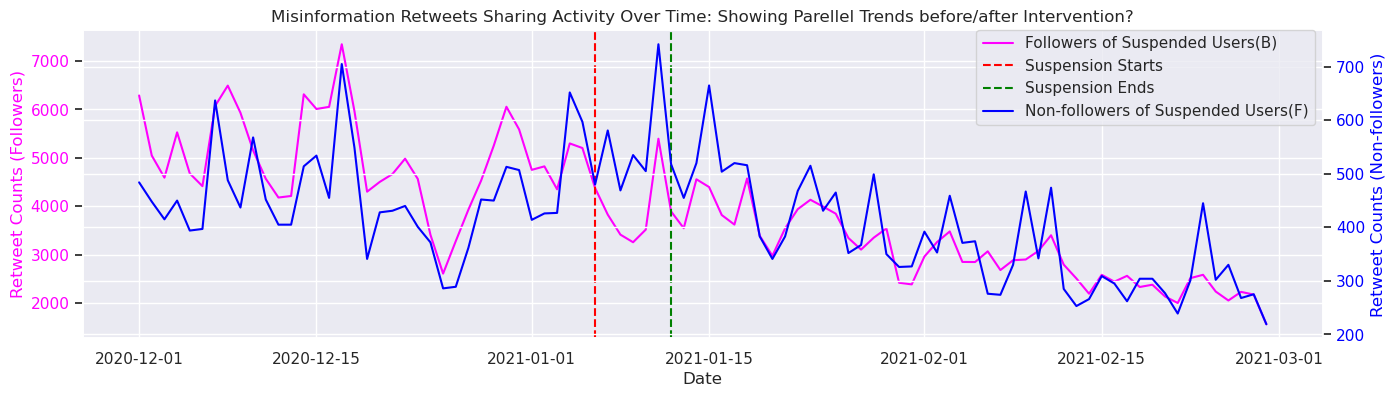

In [81]:
# Subset the data to include only followers of suspended users (B) 
# from 2020-12-01 to 2021-03-01
B1 = df[(df['group'] == 'B') & (df['stat'] == 'total') & (df['date'] >= '2020-12-01') & (df['date'] < '2021-03-01')].copy()
# Subset the data to include only non-followers of suspended users (F) 
# within the same date range (2020-12-01 to 2021-03-01)
F1 = df[(df['group'] == 'F') & (df['stat'] == 'total') & (df['date'] >= '2020-12-01') & (df['date'] < '2021-03-01')].copy()

# Create the figure and the first y-axis for Followers of Suspended Users
fig, ax1 = plt.subplots(figsize=(16, 4))

# Plot Followers of Suspended Users (B1)
ax1.plot(B1.date, B1.fake_merged_rt, color='magenta', label='Followers of Suspended Users(B)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Retweet Counts (Followers)', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')

# Create the second y-axis for Non-followers of Suspended Users
ax2 = ax1.twinx()
ax2.plot(F1.date, F1.fake_merged_rt, color='blue', label='Non-followers of Suspended Users(F)')
ax2.set_ylabel('Retweet Counts (Non-followers)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add vertical lines for the suspension period
ax1.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--', label='Suspension Starts')
ax1.axvline(pd.to_datetime('2021-01-12'), color='green', linestyle='--', label='Suspension Ends')

# Add legends for both lines
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.title("Misinformation Retweets Sharing Activity Over Time: Showing Parellel Trends before/after Intervention?")

# Display the plot
plt.show()

<font color='brown'> **4.2. Analyzing Misinformation Sharing Among QAnon Users vs Others** 

I also extended the analysis by focusing on specific subgroup, QAnon followers, who experienced a noticeable decline in activity after the deplatforming. This group was already targeted by Twitter’s content moderation efforts, and the intervention significantly reduced both their posting frequency and their sharing of misinformation URLs. The drastic decline suggests that Twitter's deplatforming intervention successfully disrupted misinformation ecosystems, especially among centralized groups like QAnon. It underscores the differing dynamics between highly centralized versus decentralized groups, revealing important insights into how content moderation can shape the platform's information landscape.

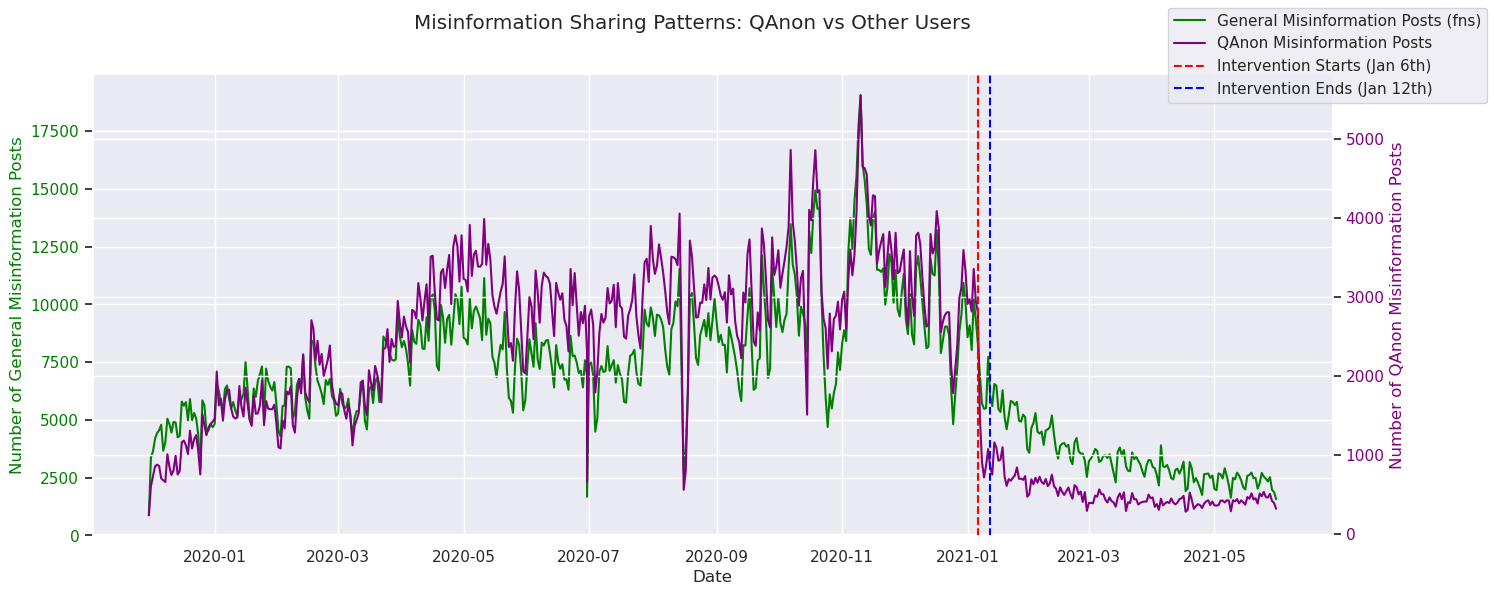

In [87]:
# Subset to QAnon and other users (fns - general misinformation sharers)
qanon_users = df[(df['group'] == 'qanon') & (df['stat'] == 'total')].copy()
fns_users = df[(df['group'] == 'fns') & (df['stat'] == 'total')].copy()

# Create the figure and the first axis for general misinformation sharers (fns)
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot general misinformation posts on the first y-axis
ax1.plot(fns_users.date, fns_users.fake_merged, label='General Misinformation Posts (fns)', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of General Misinformation Posts', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create the second y-axis for QAnon misinformation posts
ax2 = ax1.twinx()
ax2.plot(qanon_users.date, qanon_users.fake_merged, label='QAnon Misinformation Posts', color='purple')
ax2.set_ylabel('Number of QAnon Misinformation Posts', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add vertical lines for intervention start and end dates
plt.axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--', label='Intervention Starts (Jan 6th)')
plt.axvline(pd.to_datetime('2021-01-12'), color='blue', linestyle='--', label='Intervention Ends (Jan 12th)')

# Add the title and legend
fig.suptitle('Misinformation Sharing Patterns: QAnon vs Other Users')
fig.legend(loc='upper right')

# Show the plot
plt.show()


---

# **Section 5** Conclusions and Reflections
 **Did deplatforming reduce misinformation on Twitter?**

**5.1 Conclusion: Did deplatforming reduce misinformation on Twitter?** <br>
Yes, the deplatforming intervention effectively reduced the spread of misinformation on Twitter. The data analysis and DiD model confirm that both directly deplatformed users and their followers reduced their misinformation sharing post-intervention. The intervention had a lasting impact on platform dynamics, reshaping the content landscape by discouraging the spread of misinformation not only from suspended users but also among those indirectly connected to them. This project demonstrates that strategic interventions by social media platforms can have measurable, positive effects on reducing the spread of harmful content.

**5.2 Dataset Strenghts and Limitations** <br>
The dataset used for this analysis offers meaningful insights but also presents certain limitations. It provides granular, daily-level observations of user engagement and misinformation sharing, capturing the behavior of various groups such as QAnon followers, Trump supporters, and general misinformation sharers. This structure allows for detailed comparisons of activity before and after the deplatforming event. <br> However, the reliance on predefined lists to classify misinformation can introduce biases, as such lists may not account for nuanced or contextual elements of certain posts. Furthermore, the time window of the study is limited, with only a few weeks of data available for the post-intervention period, which restricts the ability to assess the long-term effects of deplatforming.

**5.3 Effectiveness of the DiD Model** <br>
The DiD model proves to be an effective tool for identifying the impact of the intervention, as it compares changes between followers (treatment group) and non-followers (control group) before and after the intervention. The results indicate that followers of suspended accounts exhibited a significant reduction in misinformation sharing, while non-followers showed a less pronounced decline. This provides evidence that deplatforming can curb the spread of misinformation not only among directly affected users but also within their extended networks. <br> However, it is important to acknowledge the limitations of the DiD approach. Although the study tested and validated the parallel trends assumption, a longer observation period could have enhanced the robustness of the findings. Additionally, the method cannot fully account for confounding factors such as user migration to other platforms like Parler or Gab.

**5.4 Are the conclusions of McCabe et al. justified?** <br>
The conclusions drawn by McCabe et al. are largely supported by my replication and extension of the analysis. The reduction in misinformation posts among both deplatformed users and their followers aligns with the original findings, confirming that the intervention successfully disrupted the spread of harmful content. My extended analysis, which included a focus on high-activity users and QAnon followers, further reinforces the conclusion that the deplatforming event had a broad and lasting impact. <br> However, it would have been valuable to examine user migration patterns more closely to understand how misinformation might have shifted from Twitter to alternative platforms. Tracking such movements could provide a more comprehensive view of Twitter's intervention’s impact on the wider misinformation ecosystem.

**5.5 Broader Reflection on the Impact of Misinformation and the Role of Data Science:** <br>
More broadly, this project highlights the critical role that data science can play in addressing the spread of misinformation on social media. Misinformation presents a substantial threat to public discourse, influencing political events, public health decisions, and societal trust. I believe that while deplatforming can be an effective content moderation strategy, it must be part of a broader approach that includes continuous monitoring, improved detection algorithms, and cross-platform coordination. The insights gained through this project emphasize the need for further research into how misinformation networks operate and how interventions can be optimized to promote healthier information ecosystems. <br> In conclusion, the deplatforming intervention implemented by Twitter effectively reduced misinformation sharing on the platform, with both direct and indirect impacts on user behavior. The findings demonstrate that strategic content moderation can mitigate the influence of harmful actors and promote more positive engagement online. However, to fully address the complex challenge of misinformation, platforms must continue to develop comprehensive policies that go beyond deplatforming, ensuring that users receive accurate information and remain engaged in meaningful discourse.